In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Optional: for consistent results
import warnings
warnings.filterwarnings('ignore')


In [33]:
# Load the uploaded CSV
df = pd.read_csv('dataset/kidney.csv')

# Preview the data
df = df.drop(columns=[' '])
df.head()

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,...,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1
1,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,...,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1
2,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,...,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1
3,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,...,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1
4,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,...,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1


In [34]:
# Check missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])


Missing values per column:
 Series([], dtype: int64)


In [35]:
# Fill numeric columns with median
df.fillna(df.median(numeric_only=True), inplace=True)

# If any categorical columns have missing values, fill with mode
df.fillna(df.mode().iloc[0], inplace=True)


In [36]:
# Replace 'ChronicKidneyDisease' with your actual target column
target_column = 'Diagnosis'

X = df.drop(columns=['Diagnosis'])
y = df[target_column]


In [37]:
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [38]:
# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9307228915662651

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.04      0.08        24
           1       0.93      1.00      0.96       308

    accuracy                           0.93       332
   macro avg       0.97      0.52      0.52       332
weighted avg       0.94      0.93      0.90       332


Confusion Matrix:
 [[  1  23]
 [  0 308]]


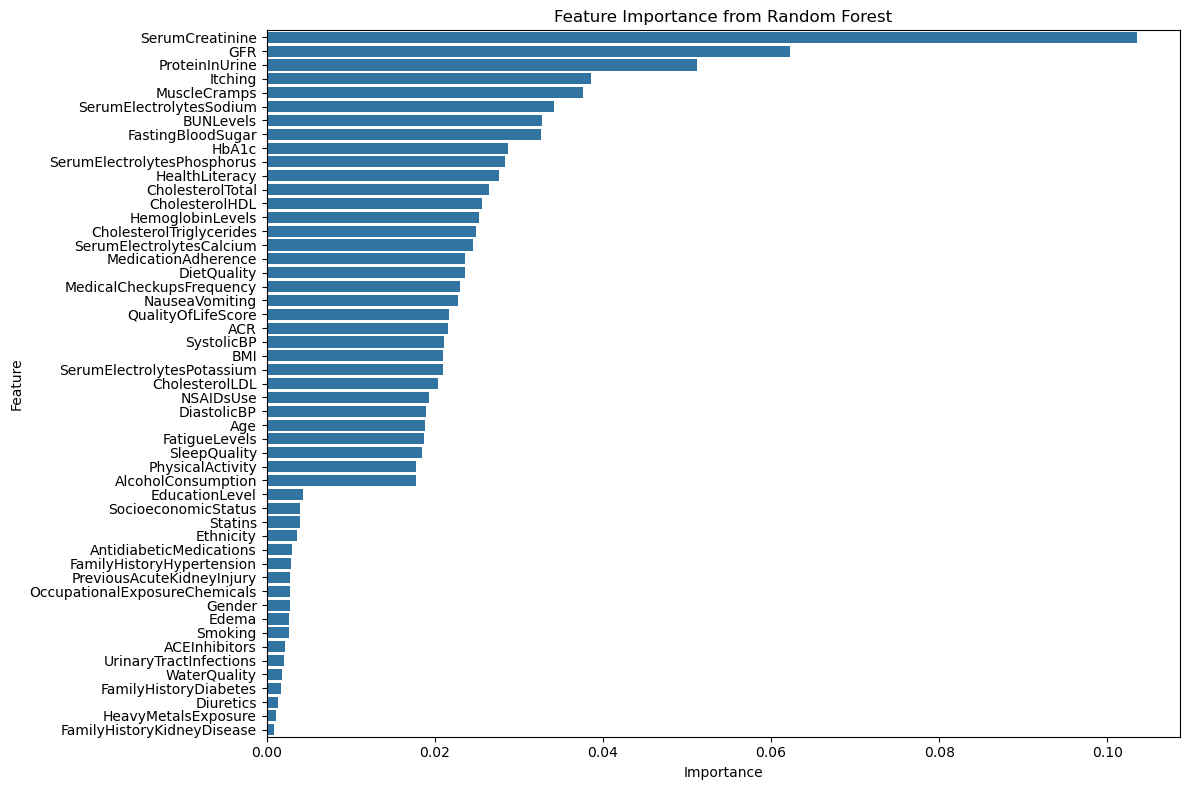

In [39]:
# Feature importance plot
importances = rf_model.feature_importances_
features = X.columns

# Create a dataframe for better visualization
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()


In [40]:
import pickle
filename = 'model/kidney_disease_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))
# You can now use the model to make predictions
y_pred = rf_model.predict(X_test)


In [41]:
df.to_csv('data_preprocessed/kidney.csv',index=False)

In [42]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print()


Column: Age
[71 34 80 40 43 22 41 72 21 49 57 83 79 52 77 68 78 61 81 66 70 74 26 58
 37 23 33 28 90 63 27 54 55 69 25 73 82 53 67 59 45 60 48 64 84 20 30 24
 47 31 42 56 46 62 32 51 85 76 89 75 38 87 36 88 35 39 86 50 44 65 29]

Column: Gender
[0 1]

Column: Ethnicity
[0 1 2 3]

Column: SocioeconomicStatus
[0 1 2]

Column: EducationLevel
[2 3 1 0]

Column: BMI
[31.06941375 29.69211876 37.39482182 ... 21.95121871 24.96414904
 19.25325818]

Column: Smoking
[1 0]

Column: AlcoholConsumption
[ 5.12811186 18.60955184 11.88242933 ... 15.82595492 12.96746151
 11.39650955]

Column: PhysicalActivity
[1.67621971 8.37757445 9.6074011  ... 7.34996438 0.61861424 7.44631444]

Column: DietQuality
[0.24038556 6.50323323 2.10482836 ... 5.0381937  4.55757703 0.75739645]

Column: SleepQuality
[4.07643366 7.65281255 4.39278611 ... 8.44085924 5.5270997  8.19167801]

Column: FamilyHistoryKidneyDisease
[0 1]

Column: FamilyHistoryHypertension
[0 1]

Column: FamilyHistoryDiabetes
[0 1]

Column: PreviousAcute